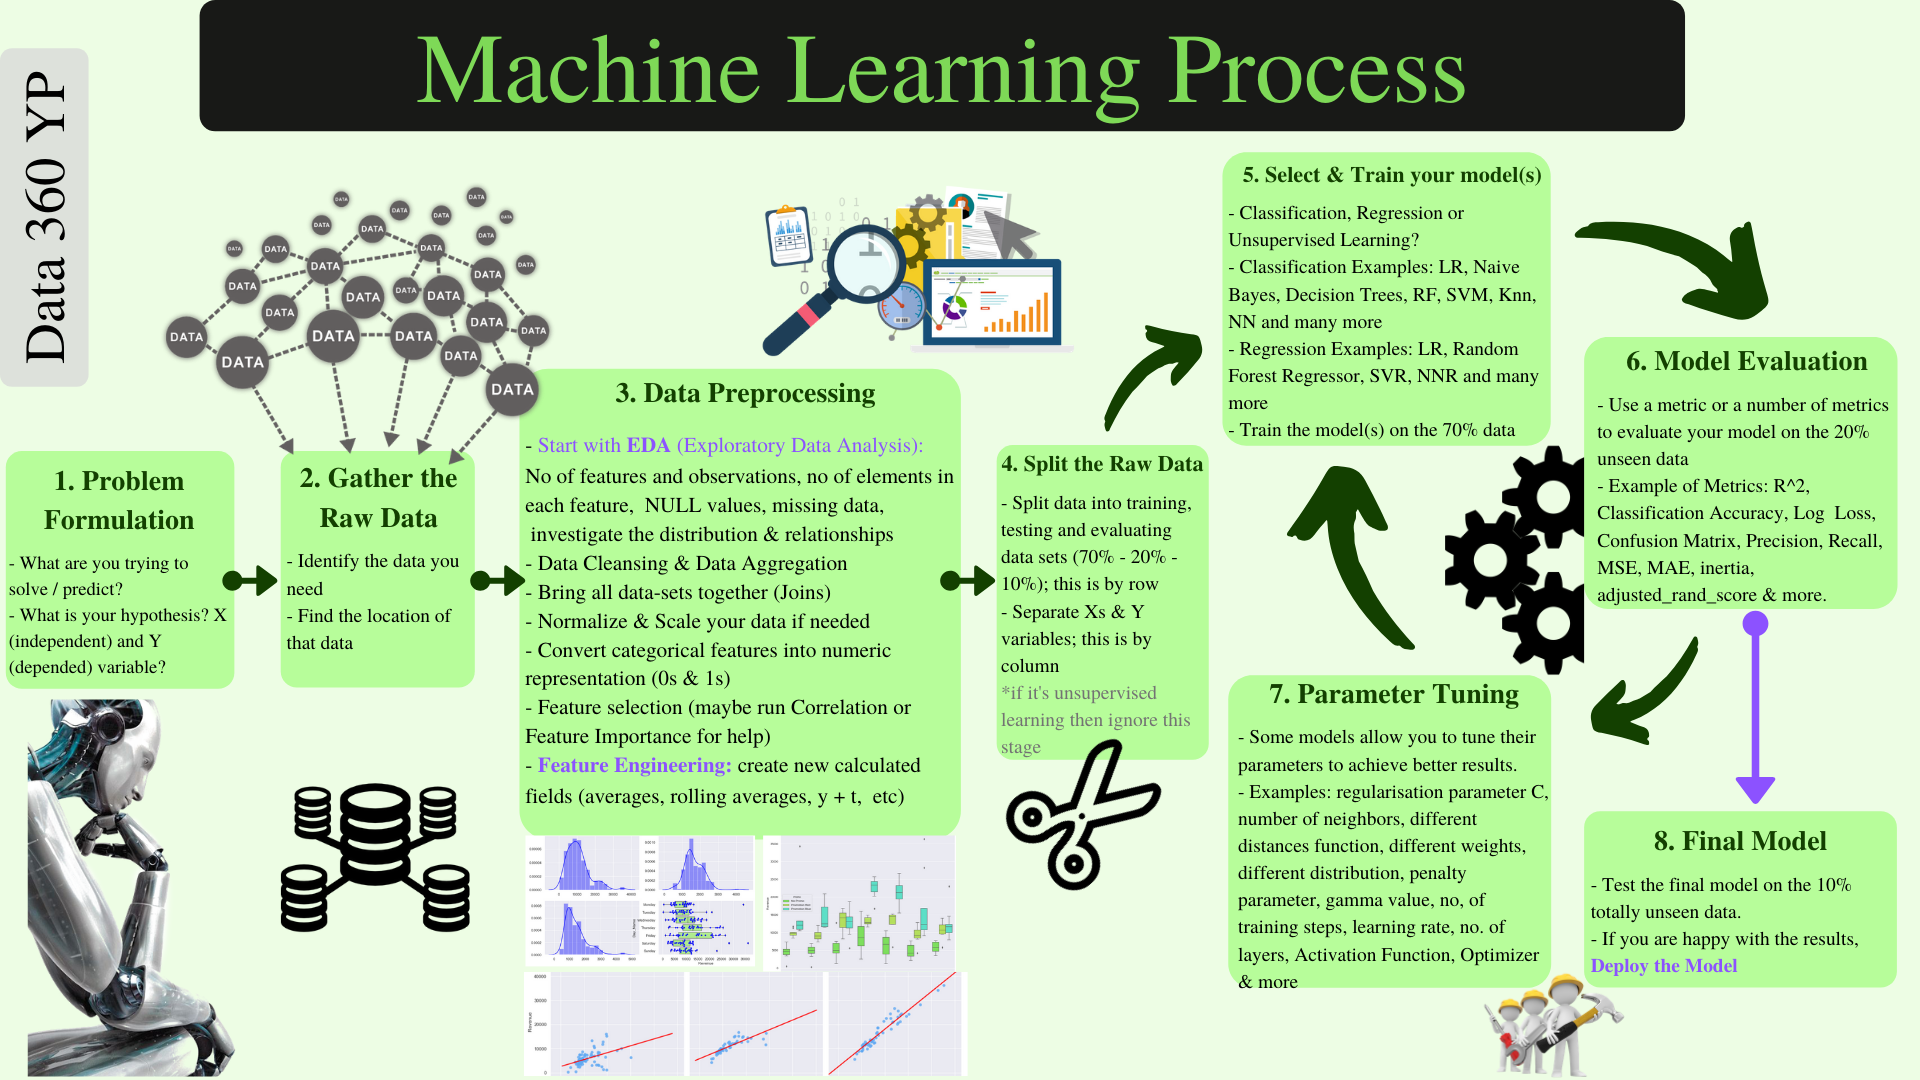

In [50]:
### Graphical ML Process

import os
from IPython.display import Image
PATH = r"C:\Users\Araz\Desktop\MUFG\\"
Image(filename = PATH + "MachineLearningProcess.png", width=900, height=900)

In [179]:
!pip install pandasql
!pip install catboost

In [52]:
#make function
pysql = lambda q: pdql.sqldf(q, globals())

In [53]:
import pandas as pd
import pandasql as pdql

In [54]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed

In [55]:
financial_data = pd.read_csv(r'C:\Users\Araz\Desktop\MUFG\financial_data.csv')

financial_data.drop('Unnamed: 0', axis=1, inplace=True)
financial_data.head(5)

LOAN_ID         PORTFOLIO  DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS  \
0  ZZZ0001               C&I    0.113703       0.795355   1156188.606   
1  ZZZ0002     CRE Permanent    0.622299       0.364232           NaN   
2  ZZZ0003  CRE Construction    0.609275       0.821238   1046682.630   
3  ZZZ0004  CRE Construction    0.623379       0.613073   1085325.470   
4  ZZZ0005  CRE Construction    0.860915       0.709228   1051378.694   

   QUICK_RATIO  CURRENT_RATIO  RETURN_ON_EQUITY  PD_RISK_RATING  
0     0.090963       0.963879        120.606137               2  
1     0.497840       0.606212        109.621719               4  
2     0.487420       0.296746         94.520306               2  
3     0.498704       0.641079         94.933871               1  
4     0.688732       0.339430        106.331848               2

In [56]:
default_data = pd.read_csv(r'C:\Users\Araz\Desktop\MUFG\default_data.csv')
default_data.drop('Unnamed: 0', axis=1, inplace=True)
default_data.head(5)

loan_number
0    ZZZ00085
1   ZZZ000101
2   ZZZ000108
3   ZZZ000119
4   ZZZ000258

In [57]:
#join tables to tag the defaulted loans

data_f = '''
        select 
            a.*
            ,case when a.LOAN_ID=b.loan_number then 1 else 0 end as default_l 
        from financial_data a left join default_data b
        on a.LOAN_ID=b.loan_number
         ;   
        '''
pysql(data_f)

LOAN_ID         PORTFOLIO  DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS  \
0         ZZZ0001               C&I    0.113703       0.795355  1.156189e+06   
1         ZZZ0002     CRE Permanent    0.622299       0.364232           NaN   
2         ZZZ0003  CRE Construction    0.609275       0.821238  1.046683e+06   
3         ZZZ0004  CRE Construction    0.623379       0.613073  1.085325e+06   
4         ZZZ0005  CRE Construction    0.860915       0.709228  1.051379e+06   
...           ...               ...         ...            ...           ...   
9995   ZZZ0009996  CRE Construction    0.270278       0.008539  8.850822e+05   
9996   ZZZ0009997  CRE Construction    0.475298       0.895215  9.043524e+05   
9997   ZZZ0009998     CRE Permanent    0.567873       0.283908  1.148198e+06   
9998   ZZZ0009999     CRE Permanent    0.386750       0.022000  9.930722e+05   
9999  ZZZ00010000     CRE Permanent    0.989971      10.123400  9.488357e+05   

      QUICK_RATIO  CURRENT_RATIO  RETURN_ON_EQUITY  PD_RISK_RATING  default_l  
0        0.090963       0.963879        120.606137               2          0  
1        0.497840       0.606212        109.621719               4          0  
2        0.487420       0.296746         94.520306               2          0  
3        0.498704       0.641079         94.933871               1          0  
4        0.688732       0.339430        106.331848               2          0  
...           ...            ...               ...             ...        ...  
9995     0.216223       0.182243         93.327910               5          0  
9996     0.380238       0.996613        110.811242               3          0  
9997     0.454298       0.030040         87.192711               2          0  
9998     0.309400       0.590155        104.540533               3          0  
9999     0.791977       0.799594         99.508643               3          0  

[10000 rows x 10 columns]

In [58]:
#create a dataframe from teh query result
data_c=pysql(data_f)

In [59]:
data_c.head()

LOAN_ID         PORTFOLIO  DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS  \
0  ZZZ0001               C&I    0.113703       0.795355   1156188.606   
1  ZZZ0002     CRE Permanent    0.622299       0.364232           NaN   
2  ZZZ0003  CRE Construction    0.609275       0.821238   1046682.630   
3  ZZZ0004  CRE Construction    0.623379       0.613073   1085325.470   
4  ZZZ0005  CRE Construction    0.860915       0.709228   1051378.694   

   QUICK_RATIO  CURRENT_RATIO  RETURN_ON_EQUITY  PD_RISK_RATING  default_l  
0     0.090963       0.963879        120.606137               2          0  
1     0.497840       0.606212        109.621719               4          0  
2     0.487420       0.296746         94.520306               2          0  
3     0.498704       0.641079         94.933871               1          0  
4     0.688732       0.339430        106.331848               2          0

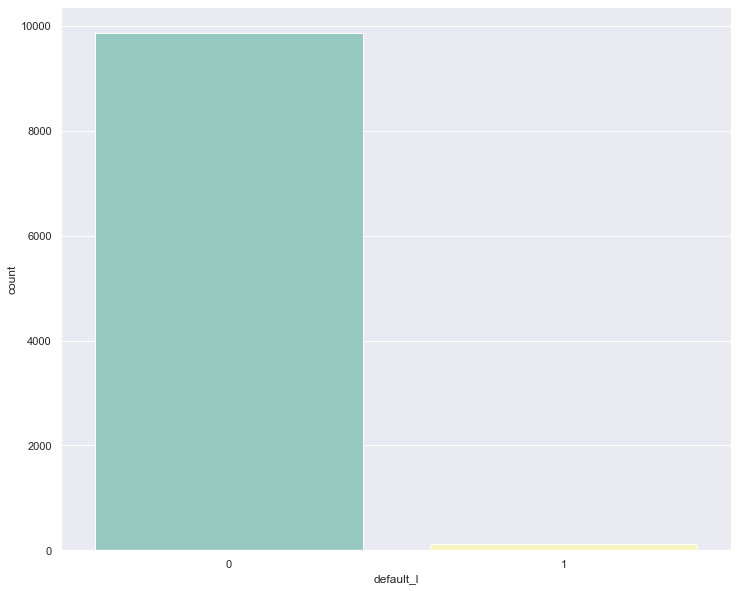

In [60]:
# Investigating the distribution of y

sns.countplot(x = 'default_l', data = data_c, palette = 'Set3')
p.label(title="Imbalanced Data")


In [61]:
# Printing the shape
print(data_c.shape)

(10000, 10)


In [62]:
#total number of defaults
tot_nr_of_def=data_c['default_l'].sum()
print(tot_nr_of_def)

129


In [63]:

# Checking for null values in features

data_c.isnull().sum()

LOAN_ID                0
PORTFOLIO              0
DEBT_RATIO          1000
PROFIT_MARGIN          0
TOTAL_ASSETS        1000
QUICK_RATIO            0
CURRENT_RATIO          0
RETURN_ON_EQUITY       0
PD_RISK_RATING         0
default_l              0
dtype: int64

In [64]:
data_c[data_c['DEBT_RATIO'].isnull()]


LOAN_ID         PORTFOLIO  DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS  \
22      ZZZ00023     CRE Permanent         NaN       0.573471           NaN   
29      ZZZ00030               C&I         NaN       0.356815  9.555703e+05   
34      ZZZ00035     CRE Permanent         NaN       0.662805           NaN   
37      ZZZ00038     CRE Permanent         NaN       0.436476           NaN   
40      ZZZ00041               C&I         NaN       0.951417  1.061820e+06   
...          ...               ...         ...            ...           ...   
9953  ZZZ0009954  CRE Construction         NaN       0.017831  1.000329e+06   
9957  ZZZ0009958     CRE Permanent         NaN       0.135664  8.816934e+05   
9962  ZZZ0009963               C&I         NaN       0.219219  1.003384e+06   
9969  ZZZ0009970  CRE Construction         NaN       0.125559  8.359673e+05   
9976  ZZZ0009977     CRE Permanent         NaN       0.486983  1.122506e+06   

      QUICK_RATIO  CURRENT_RATIO  RETURN_ON_EQUITY  PD_RISK_RATING  default_l  
22       0.127237       0.246731        124.113009               2          0  
29       0.036616       0.467428         85.020747               3          0  
34       0.144877       0.398024        100.452714               1          0  
37       0.207048       0.961347         97.683419               1          0  
40       0.442667       0.832401        107.028056               2          0  
...           ...            ...               ...             ...        ...  
9953     0.291110       0.250401         99.497987               3          0  
9957     0.396328       0.368977         96.653780               7          0  
9962     0.652428       0.608928         86.647703               3          0  
9969     0.307536       0.224769        116.036152               5          0  
9976     0.036905       0.173385        103.829972               1          0  

[1000 rows x 10 columns]

In [66]:
data_c[data_c['TOTAL_ASSETS'].isnull()]

LOAN_ID         PORTFOLIO  DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS  \
1        ZZZ0002     CRE Permanent    0.622299       0.364232           NaN   
8        ZZZ0009  CRE Construction    0.666084       0.222746           NaN   
9       ZZZ00010  CRE Construction    0.514251       9.987000           NaN   
13      ZZZ00014  CRE Construction    0.923433       0.619878           NaN   
15      ZZZ00016     CRE Permanent    0.837296       0.217779           NaN   
...          ...               ...         ...            ...           ...   
9922  ZZZ0009923               C&I    0.206959       0.886858           NaN   
9937  ZZZ0009938     CRE Permanent    0.243483       0.384530           NaN   
9939  ZZZ0009940  CRE Construction    0.090892       0.574466           NaN   
9946  ZZZ0009947  CRE Construction    0.413869       0.145694           NaN   
9970  ZZZ0009971  CRE Construction    0.054648       0.686667           NaN   

      QUICK_RATIO  CURRENT_RATIO  RETURN_ON_EQUITY  PD_RISK_RATING  default_l  
1        0.497840       0.606212        109.621719               4          0  
8        0.532867       0.394401        103.877365               6          0  
9        0.411401       0.026673        107.036967               2          0  
13       0.738747       0.779440        107.497253               6          0  
15       0.669837       0.394807        102.998031               2          0  
...           ...            ...               ...             ...        ...  
9922     0.165567       0.909365         87.537276               2          0  
9937     0.194786       0.155747         79.892905               4          0  
9939     0.072714       0.236353        105.139555               2          0  
9946     0.331096       0.698342        108.713615               1          0  
9970     0.043718       0.773938        102.430691               1          0  

[1000 rows x 10 columns]

In [67]:
#replace missing data points with mean of total assets

# Deleting the NULL values
#data_c = data_c.dropna(subset = ['TOTAL_ASSETS']) we don't remove to keep the default loans
data_c['TOTAL_ASSETS'] = data_c['TOTAL_ASSETS'].fillna((data_c['TOTAL_ASSETS'].mean()))
# Printing the shape
print(data_c.shape)

# Visualize the NULL observations
data_c.isnull().sum()

(10000, 10)


LOAN_ID                0
PORTFOLIO              0
DEBT_RATIO          1000
PROFIT_MARGIN          0
TOTAL_ASSETS           0
QUICK_RATIO            0
CURRENT_RATIO          0
RETURN_ON_EQUITY       0
PD_RISK_RATING         0
default_l              0
dtype: int64

In [68]:
#total number of defaults after removing missing

tot_nr_of_def=data_c['default_l'].sum()
print(tot_nr_of_def)

129


In [69]:
#replace missing  data points with mean debt ratio

#data_c = data_c.dropna(subset = ['DEBT_RATIO'])
data_c['DEBT_RATIO'] = data_c['DEBT_RATIO'].fillna((data_c['DEBT_RATIO'].mean()))
# Printing the shape
print(data_c.shape)

# Visualize the NULL observations
data_c.isnull().sum()

(10000, 10)


LOAN_ID             0
PORTFOLIO           0
DEBT_RATIO          0
PROFIT_MARGIN       0
TOTAL_ASSETS        0
QUICK_RATIO         0
CURRENT_RATIO       0
RETURN_ON_EQUITY    0
PD_RISK_RATING      0
default_l           0
dtype: int64

In [70]:
# Printing the shape after removing missing
print(data_c.shape)

(10000, 10)


In [71]:
#total number of defaults after removing missing
tot_nr_of_def=data_c['default_l'].sum()
print(tot_nr_of_def)

129


(10000, 10)
         DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS   QUICK_RATIO  CURRENT_RATIO  \
count  10000.000000   10000.000000  1.000000e+04  10000.000000   10000.000000   
mean       0.500821       0.500171  9.990384e+05      0.400250       0.495674   
std        0.273118       0.334494  9.556056e+04      0.229641       0.290899   
min        0.000342       0.000148  6.449835e+05      0.000273       0.000065   
25%        0.278703       0.250202  9.382717e+05      0.201990       0.242502   
50%        0.500821       0.495737  9.990384e+05      0.401013       0.491026   
75%        0.722143       0.743321  1.058886e+06      0.597996       0.749245   
max        0.999594      10.124300  1.372729e+06      0.799675       0.999974   

       RETURN_ON_EQUITY  PD_RISK_RATING     default_l  
count      10000.000000    10000.000000  10000.000000  
mean         100.075516        2.989500      0.012900  
std           10.095165        1.925035      0.112849  
min           61.657742        1.0

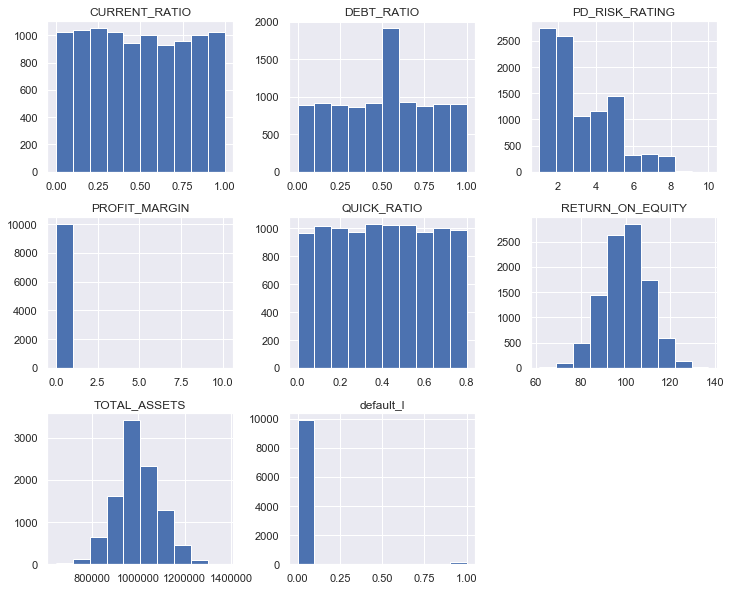

In [72]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# summarize the shape of the dataset
print(data_c.shape)
# summarize each variable
print(data_c.describe())
# histograms of the variables
data_c.hist()
pyplot.show()

In [73]:
# Investigate all the elements whithin each Feature 

for column in data_c:
    unique_values = np.unique(data_c[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature LOAN_ID is: 10000
The number of values for feature PORTFOLIO is: 3 -- ['C&I' 'CRE Construction' 'CRE Permanent']
The number of values for feature DEBT_RATIO is: 9001
The number of values for feature PROFIT_MARGIN is: 10000
The number of values for feature TOTAL_ASSETS is: 9001
The number of values for feature QUICK_RATIO is: 10000
The number of values for feature CURRENT_RATIO is: 10000
The number of values for feature RETURN_ON_EQUITY is: 10000
The number of values for feature PD_RISK_RATING is: 10 -- [ 1  2  3  4  5  6  7  8  9 10]
The number of values for feature default_l is: 2 -- [0 1]


In [74]:
data_c.columns

Index(['LOAN_ID', 'PORTFOLIO', 'DEBT_RATIO', 'PROFIT_MARGIN', 'TOTAL_ASSETS',
       'QUICK_RATIO', 'CURRENT_RATIO', 'RETURN_ON_EQUITY', 'PD_RISK_RATING',
       'default_l'],
      dtype='object')

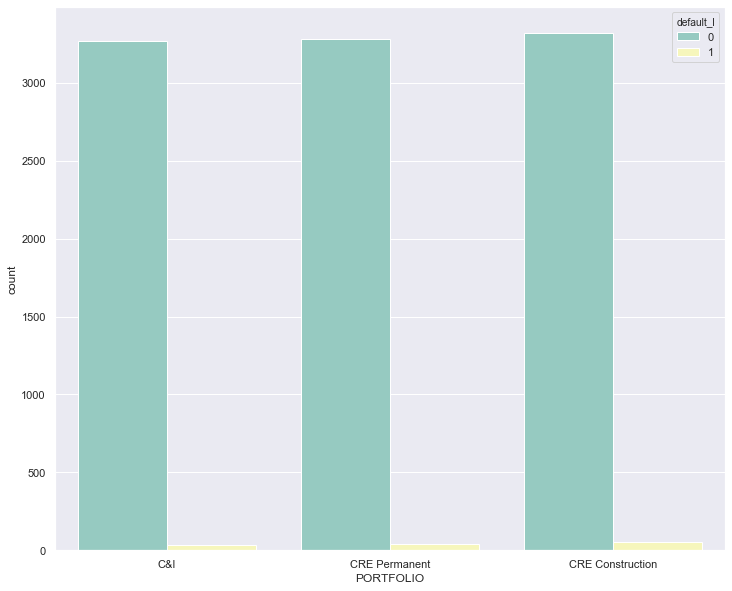

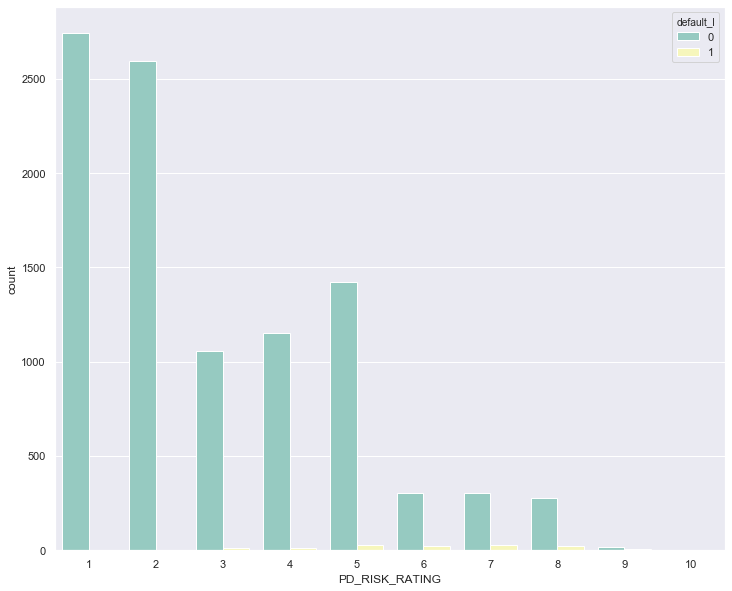

In [75]:
# Looping through all the features by our y variable - see if there is relationship

features = ['PORTFOLIO', 'PD_RISK_RATING']

for f in features:
    sns.countplot(x = f, data = data_c, palette = 'Set3', hue = 'default_l')
    plt.show()
    
#It appears that default rate in varies considerably across 3 diffrent portfolio, with CRE Construction being highest dafault and C&I lowest

In [76]:

# Making categorical variables into numeric representation

new_data_c = pd.get_dummies(data_c, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(data_c.shape)
# print the shape
print(new_data_c.shape)


# Visualizing the data
new_data_c

(10000, 10)
(10000, 21)


LOAN_ID  DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS  QUICK_RATIO  \
0         ZZZ0001    0.113703       0.795355  1.156189e+06     0.090963   
1         ZZZ0002    0.622299       0.364232  9.990384e+05     0.497840   
2         ZZZ0003    0.609275       0.821238  1.046683e+06     0.487420   
3         ZZZ0004    0.623379       0.613073  1.085325e+06     0.498704   
4         ZZZ0005    0.860915       0.709228  1.051379e+06     0.688732   
...           ...         ...            ...           ...          ...   
9995   ZZZ0009996    0.270278       0.008539  8.850822e+05     0.216223   
9996   ZZZ0009997    0.475298       0.895215  9.043524e+05     0.380238   
9997   ZZZ0009998    0.567873       0.283908  1.148198e+06     0.454298   
9998   ZZZ0009999    0.386750       0.022000  9.930722e+05     0.309400   
9999  ZZZ00010000    0.989971      10.123400  9.488357e+05     0.791977   

      CURRENT_RATIO  RETURN_ON_EQUITY  default_l  PORTFOLIO_C&I  \
0          0.963879        120.606137          0              1   
1          0.606212        109.621719          0              0   
2          0.296746         94.520306          0              0   
3          0.641079         94.933871          0              0   
4          0.339430        106.331848          0              0   
...             ...               ...        ...            ...   
9995       0.182243         93.327910          0              0   
9996       0.996613        110.811242          0              0   
9997       0.030040         87.192711          0              0   
9998       0.590155        104.540533          0              0   
9999       0.799594         99.508643          0              0   

      PORTFOLIO_CRE Construction  ...  PD_RISK_RATING_1  PD_RISK_RATING_2  \
0                              0  ...                 0                 1   
1                              0  ...                 0                 0   
2                              1  ...                 0                 1   
3                              1  ...                 1                 0   
4                              1  ...                 0                 1   
...                          ...  ...               ...               ...   
9995                           1  ...                 0                 0   
9996                           1  ...                 0                 0   
9997                           0  ...                 0                 1   
9998                           0  ...                 0                 0   
9999                           0  ...                 0                 0   

      PD_RISK_RATING_3  PD_RISK_RATING_4  PD_RISK_RATING_5  PD_RISK_RATING_6  \
0                    0                 0                 0                 0   
1                    0                 1                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
9995                 0                 0                 1                 0   
9996                 1                 0                 0                 0   
9997                 0                 0                 0                 0   
9998                 1                 0                 0                 0   
9999                 1                 0                 0                 0   

      PD_RISK_RATING_7  PD_RISK_RATING_8  PD_RISK_RATING_9  PD_RISK_RATING_10  
0                    0                 0                 0                  0  
1                    0                 0                 0                  0  
2                    0                 0                 0                  0  
3                    0                 0                 0                  0  
4                 

In [78]:
#MinMaxScaler Transform

data_c=new_data_c

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data_c['RETURN_ON_EQUITY'] = data_c['RETURN_ON_EQUITY'].div(100)

scaler = MinMaxScaler()
data_c['TOTAL_ASSETS'] = scaler.fit_transform(data_c[['TOTAL_ASSETS']])

(10000, 21)
         DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS   QUICK_RATIO  CURRENT_RATIO  \
count  10000.000000   10000.000000  10000.000000  10000.000000   10000.000000   
mean       0.500821       0.500171      0.486509      0.400250       0.495674   
std        0.273118       0.334494      0.131310      0.229641       0.290899   
min        0.000342       0.000148      0.000000      0.000273       0.000065   
25%        0.278703       0.250202      0.403009      0.201990       0.242502   
50%        0.500821       0.495737      0.486509      0.401013       0.491026   
75%        0.722143       0.743321      0.568747      0.597996       0.749245   
max        0.999594      10.124300      1.000000      0.799675       0.999974   

       RETURN_ON_EQUITY     default_l  PORTFOLIO_C&I  \
count      10000.000000  10000.000000   10000.000000   
mean           0.010008      0.012900       0.330300   
std            0.001010      0.112849       0.470345   
min            0.006166      0.000

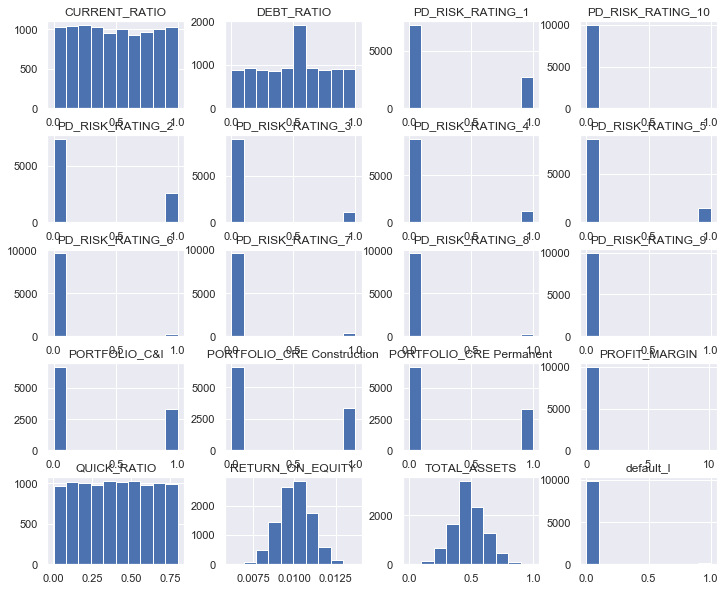

In [79]:
#verify the distributions after transformatio

# summarize the shape of the dataset
print(data_c.shape)
# summarize each variable
print(data_c.describe())
# histograms of the variables
data_c.hist()
pyplot.show()

In [183]:
#Adressing Imbalanced Data

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


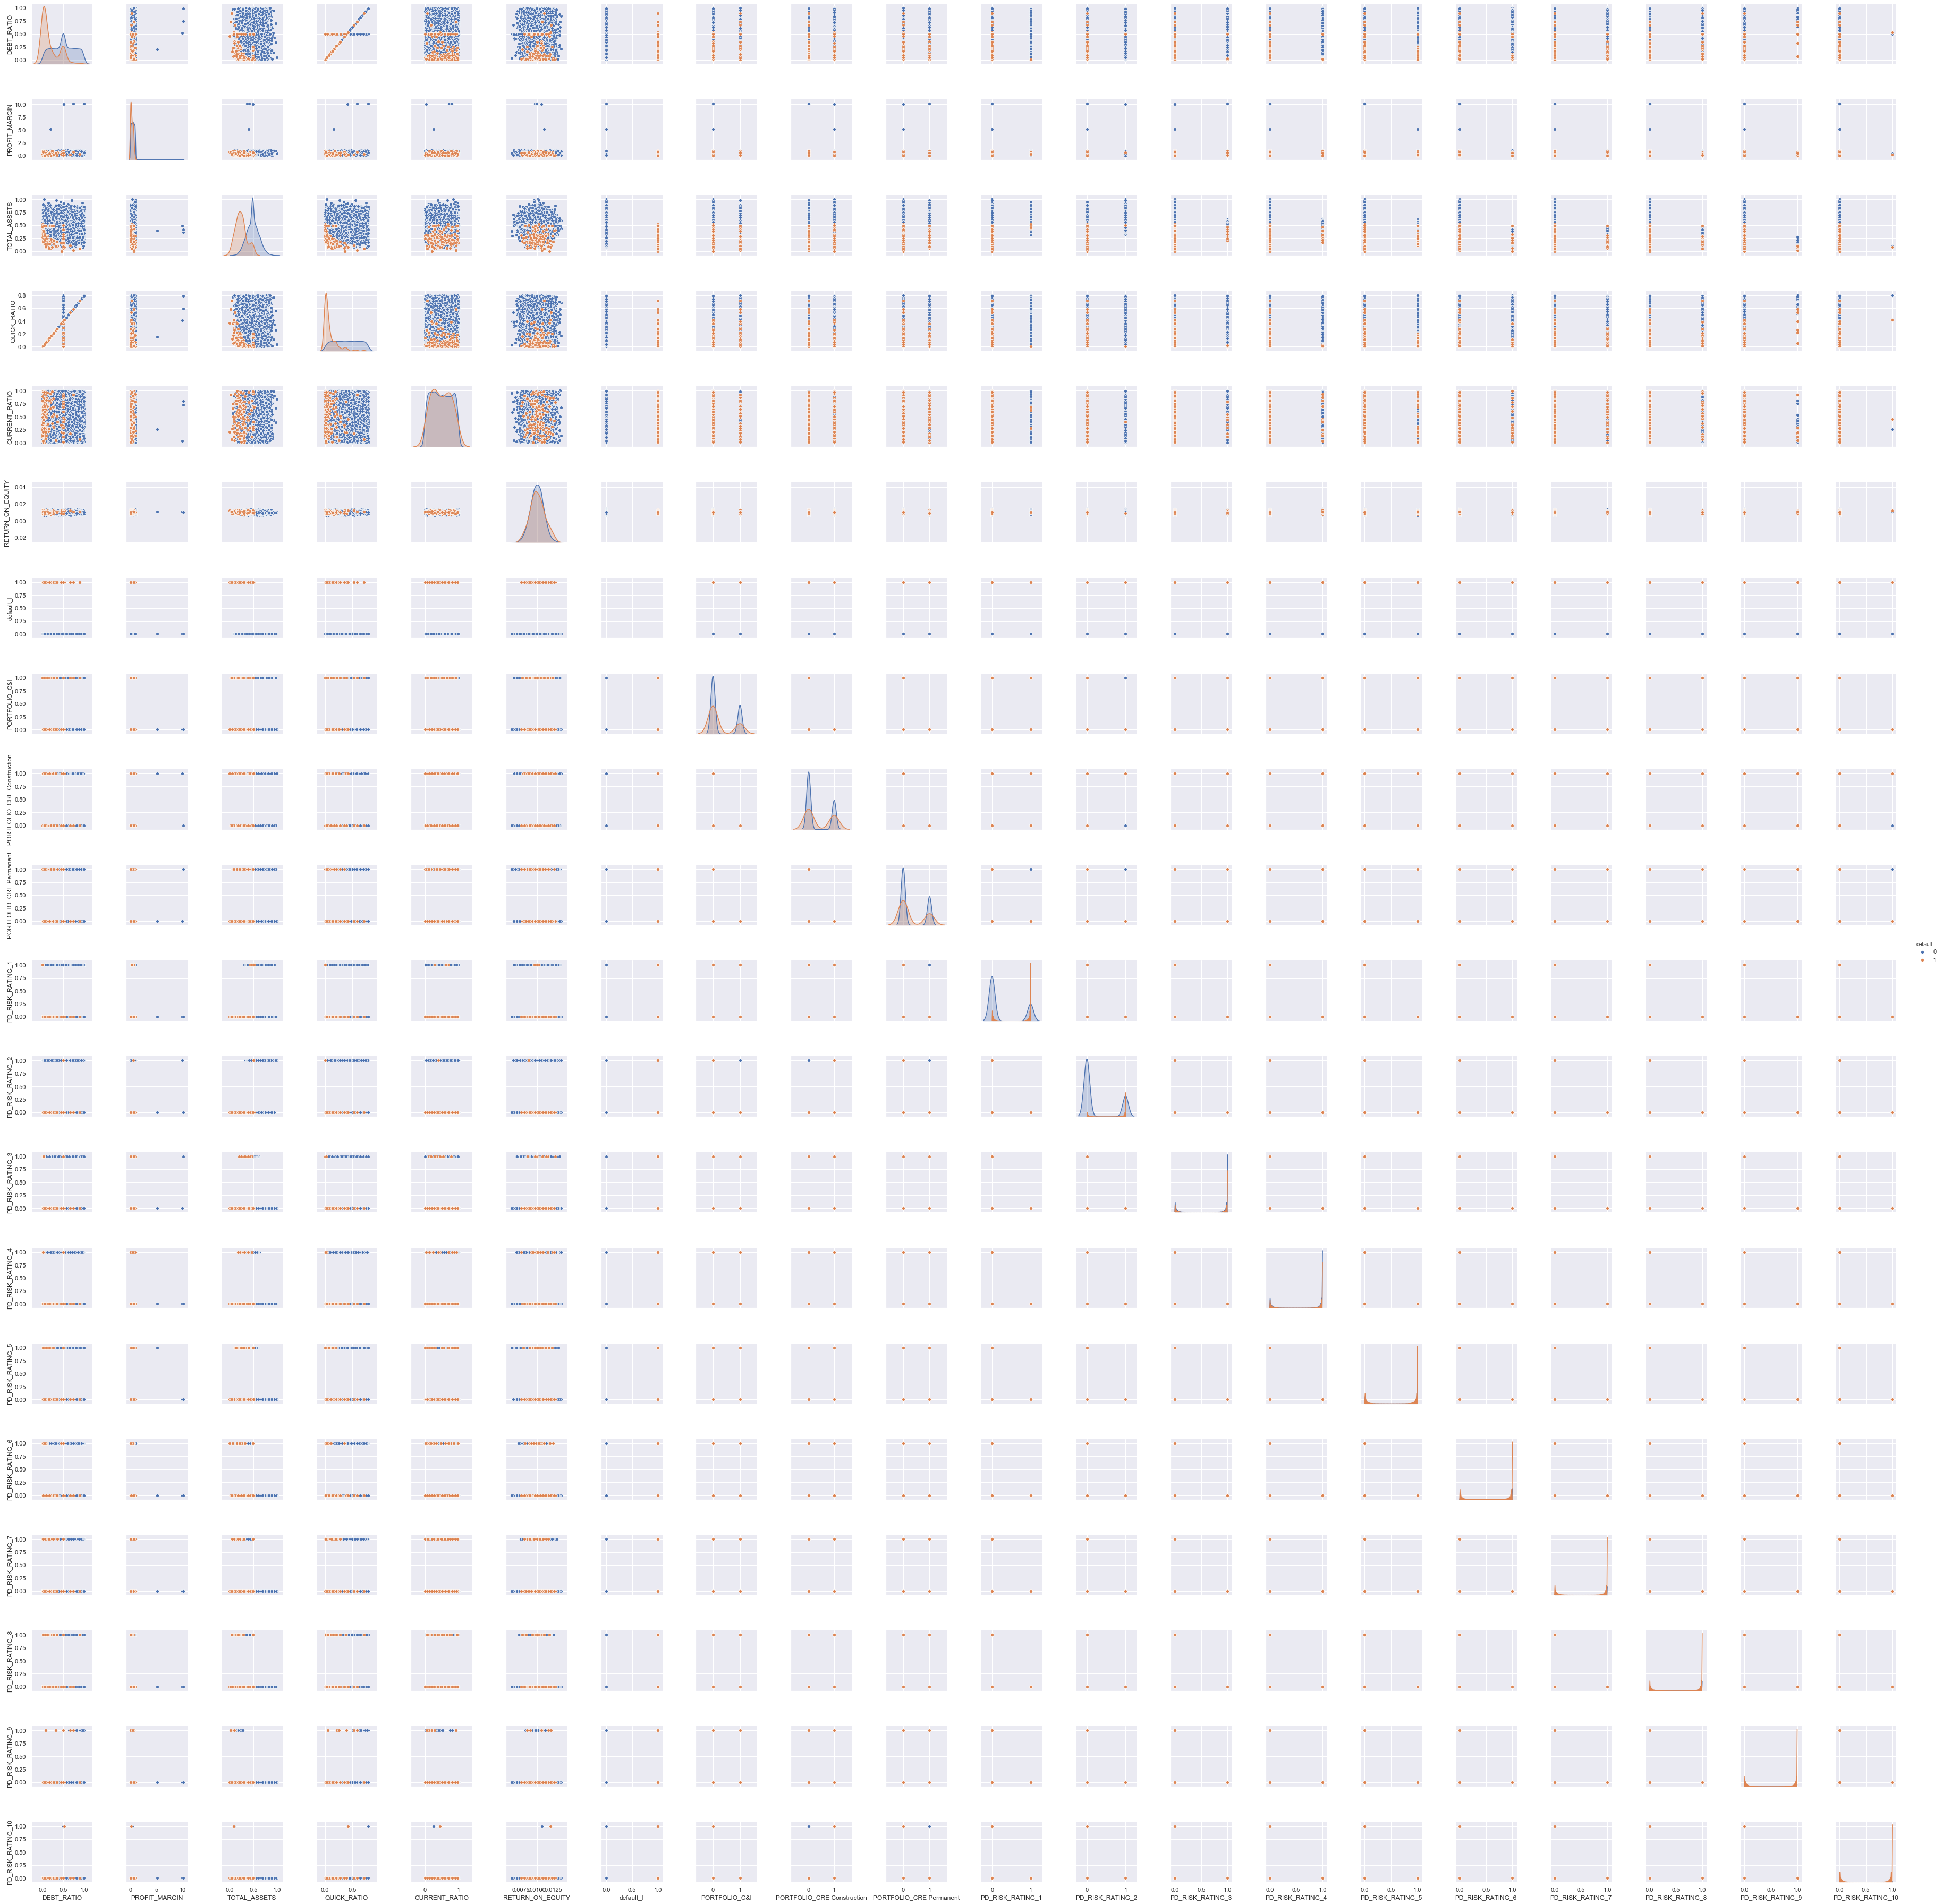

In [83]:
g = sns.pairplot(data_c, hue = 'default_l')

In [189]:
# Separate input features and target
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

print(data_c)
#cols = [1]
#data_c.drop(data_c.columns[cols],axis=1,inplace=True)
#print(data_c)

y = data_c.default_l
X = data_c.drop(['LOAN_ID'], axis=1)


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

#Here we can use the DummyClassifier to always predict “not fraud” just to show how misleading accuracy can be.

          LOAN_ID  DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS  QUICK_RATIO  \
0         ZZZ0001    0.113703       0.795355      0.702450     0.090963   
1         ZZZ0002    0.622299       0.364232      0.486509     0.497840   
2         ZZZ0003    0.609275       0.821238      0.551977     0.487420   
3         ZZZ0004    0.623379       0.613073      0.605077     0.498704   
4         ZZZ0005    0.860915       0.709228      0.558430     0.688732   
...           ...         ...            ...           ...          ...   
9995   ZZZ0009996    0.270278       0.008539      0.329921     0.216223   
9996   ZZZ0009997    0.475298       0.895215      0.356400     0.380238   
9997   ZZZ0009998    0.567873       0.283908      0.691470     0.454298   
9998   ZZZ0009999    0.386750       0.022000      0.478311     0.309400   
9999  ZZZ00010000    0.989971      10.123400      0.417525     0.791977   

      CURRENT_RATIO  RETURN_ON_EQUITY  default_l  PORTFOLIO_C&I  \
0          0.963879          0.0

In [84]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
accuracy_score(y_test, lr_pred)

print(accuracy_score)
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

# f1 score
f1_score(y_test, lr_pred)
  
# recall score
recall_score(y_test, lr_pred)



<function accuracy_score at 0x00000171854E61F8>


1.0

In [85]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(y_test, rfc_pred)

f1_score(y_test, rfc_pred)

recall_score(y_test, rfc_pred)



1.0

In [101]:
from catboost import CatBoostClassifier
# Initialize and train the CatBoost Classifier
# train model
cbc = CatBoostClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
cbc_pred = cbc.predict(X_test)

accuracy_score(y_test, cbc_pred)

f1_score(y_test, cbc_pred)

recall_score(y_test, cbc_pred)


Learning rate set to 0.5
0:	learn: 0.3354897	total: 5.27ms	remaining: 47.4ms
1:	learn: 0.2001766	total: 10.8ms	remaining: 43.1ms
2:	learn: 0.1277116	total: 16.1ms	remaining: 37.5ms
3:	learn: 0.0846967	total: 20.6ms	remaining: 30.8ms
4:	learn: 0.0585930	total: 26.1ms	remaining: 26.1ms
5:	learn: 0.0427677	total: 29.6ms	remaining: 19.7ms
6:	learn: 0.0337755	total: 32.6ms	remaining: 14ms
7:	learn: 0.0265308	total: 35.7ms	remaining: 8.93ms
8:	learn: 0.0235280	total: 39.3ms	remaining: 4.37ms
9:	learn: 0.0194906	total: 43ms	remaining: 0us


0.5714285714285714

In [97]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize CatBoost Classifier
cbc = CatBoostClassifier()

# Setup RandomizedSearchCV
from scipy.stats import randint, uniform

# Parameter distribution
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

random_search_cb = RandomizedSearchCV(estimator=cbc,
                                      param_distributions=catboost_param_dist,
                                      cv=5,
                                      verbose=2,
                                      random_state=42)
# Fit the model
random_search_cb.fit(X_train, y_train)
# Evaluate the model
random_search_cb_score = random_search_cb.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] bagging_temperature=0.3745401188473625, border_count=93, depth=6, iterations=81, l2_leaf_reg=5, learning_rate=0.05680559213273095, random_strength=0.15599452033620265 
0:	learn: 0.6421984	total: 3.25ms	remaining: 260ms
1:	learn: 0.5961121	total: 6.38ms	remaining: 252ms
2:	learn: 0.5549851	total: 9.3ms	remaining: 242ms
3:	learn: 0.5170907	total: 12.7ms	remaining: 244ms
4:	learn: 0.4838949	total: 15.4ms	remaining: 234ms
5:	learn: 0.4525908	total: 18.4ms	remaining: 230ms
6:	learn: 0.4239622	total: 20.5ms	remaining: 216ms
7:	learn: 0.3973210	total: 22.7ms	remaining: 207ms
8:	learn: 0.3737315	total: 24.8ms	remaining: 199ms
9:	learn: 0.3514628	total: 27ms	remaining: 192ms
10:	learn: 0.3307580	total: 29.2ms	remaining: 186ms
11:	learn: 0.3118449	total: 32.7ms	remaining: 188ms
12:	learn: 0.2940093	total: 34.8ms	remaining: 182ms
13:	learn: 0.2777603	total: 37ms	remaining: 177ms
14:	learn: 0.2621978	total: 39ms	remaining: 172ms
15:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


61:	learn: 0.0386556	total: 131ms	remaining: 40.3ms
62:	learn: 0.0377054	total: 134ms	remaining: 38.2ms
63:	learn: 0.0367557	total: 136ms	remaining: 36.1ms
64:	learn: 0.0359168	total: 138ms	remaining: 34ms
65:	learn: 0.0350847	total: 140ms	remaining: 31.8ms
66:	learn: 0.0341786	total: 142ms	remaining: 29.7ms
67:	learn: 0.0334888	total: 144ms	remaining: 27.5ms
68:	learn: 0.0328141	total: 146ms	remaining: 25.4ms
69:	learn: 0.0321317	total: 149ms	remaining: 23.4ms
70:	learn: 0.0315093	total: 151ms	remaining: 21.3ms
71:	learn: 0.0308877	total: 154ms	remaining: 19.3ms
72:	learn: 0.0302979	total: 157ms	remaining: 17.2ms
73:	learn: 0.0297160	total: 159ms	remaining: 15ms
74:	learn: 0.0292596	total: 162ms	remaining: 12.9ms
75:	learn: 0.0287503	total: 165ms	remaining: 10.8ms
76:	learn: 0.0281855	total: 168ms	remaining: 8.71ms
77:	learn: 0.0277156	total: 170ms	remaining: 6.54ms
78:	learn: 0.0273218	total: 173ms	remaining: 4.38ms
79:	learn: 0.0268438	total: 176ms	remaining: 2.21ms
80:	learn: 0.026

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


29:	learn: 0.1201801	total: 76.7ms	remaining: 130ms
30:	learn: 0.1148360	total: 79.6ms	remaining: 128ms
31:	learn: 0.1096294	total: 82ms	remaining: 126ms
32:	learn: 0.1047338	total: 84.1ms	remaining: 122ms
33:	learn: 0.1001311	total: 86.5ms	remaining: 120ms
34:	learn: 0.0958455	total: 88.7ms	remaining: 117ms
35:	learn: 0.0917050	total: 90.8ms	remaining: 113ms
36:	learn: 0.0878489	total: 93.4ms	remaining: 111ms
37:	learn: 0.0841923	total: 95.5ms	remaining: 108ms
38:	learn: 0.0808161	total: 97.8ms	remaining: 105ms
39:	learn: 0.0775867	total: 100ms	remaining: 103ms
40:	learn: 0.0744296	total: 102ms	remaining: 99.6ms
41:	learn: 0.0717237	total: 104ms	remaining: 96.9ms
42:	learn: 0.0688804	total: 107ms	remaining: 94.3ms
43:	learn: 0.0663905	total: 109ms	remaining: 91.5ms
44:	learn: 0.0639322	total: 132ms	remaining: 105ms
45:	learn: 0.0616084	total: 137ms	remaining: 104ms
46:	learn: 0.0593642	total: 140ms	remaining: 101ms
47:	learn: 0.0572981	total: 143ms	remaining: 98.1ms
48:	learn: 0.05538

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


5:	learn: 0.0132418	total: 60.7ms	remaining: 7.88s
6:	learn: 0.0116668	total: 72ms	remaining: 8s
7:	learn: 0.0102310	total: 83.1ms	remaining: 8.07s
8:	learn: 0.0093577	total: 94.5ms	remaining: 8.15s
9:	learn: 0.0086724	total: 106ms	remaining: 8.19s
10:	learn: 0.0079420	total: 116ms	remaining: 8.18s
11:	learn: 0.0068328	total: 126ms	remaining: 8.15s
12:	learn: 0.0064680	total: 137ms	remaining: 8.12s
13:	learn: 0.0057369	total: 148ms	remaining: 8.15s
14:	learn: 0.0054776	total: 160ms	remaining: 8.2s
15:	learn: 0.0049836	total: 170ms	remaining: 8.19s
16:	learn: 0.0048105	total: 181ms	remaining: 8.17s
17:	learn: 0.0044902	total: 193ms	remaining: 8.21s
18:	learn: 0.0041479	total: 203ms	remaining: 8.17s
19:	learn: 0.0039613	total: 213ms	remaining: 8.14s
20:	learn: 0.0036077	total: 223ms	remaining: 8.11s
21:	learn: 0.0035138	total: 234ms	remaining: 8.11s
22:	learn: 0.0031332	total: 244ms	remaining: 8.1s
23:	learn: 0.0030202	total: 255ms	remaining: 8.08s
24:	learn: 0.0028141	total: 266ms	remai

In [100]:
# predict on test set before oversampling/undersampling
random_search_cb_pred = random_search_cb.predict(X_test)

accuracy_score(y_test, random_search_cb_pred)

f1_score(y_test, random_search_cb_pred)

recall_score(y_test, random_search_cb_pred)

##Accuracy ration on imbalanced data without treatment: 0.6857142857142857

0.6857142857142857

In [102]:
from xgboost import XGBClassifier
# Initialize and train the CatBoost Classifier
# train model
xgc = XGBClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set before oversampling/undersampling
xgc_pred = xgc.predict(X_test)

accuracy_score(y_test, xgc_pred)

f1_score(y_test, xgc_pred)

recall_score(y_test, xgc_pred)
#Accuracy ration on imbalanced data without treatment: 0.4

0.4

In [192]:
#Trying Naive Bayesian Classifier after Oversampling:
# train model


from sklearn.naive_bayes import GaussianNB
# Initialize and train the Classifier
# train model
gnb = GaussianNB().fit(X_train, y_train)

# predict on test set
gnb_pred = gnb.predict(X_test)

accuracy_score(y_test, gnb_pred)

f1_score(y_test, gnb_pred)

recall_score(y_test, gnb_pred)

#Accuracy  is 1.0

1.0

In [172]:
#problem with imbalanced data : problem with Accuracy

#solutions:
#1. Change the performance metric from accuracy to : confusion matrix, precision, recall, f1 score
#2. Change the algorithm such random forest which works fine with imbalanced data
#3. Resampling Techniques — Oversample minority class
#4. Resampling techniques — Undersample majority class
#5. Generate synthetic samples (SMOTE)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))

#Counter({0: 9871, 1: 9871})

Counter({0: 9871, 1: 9871})


In [106]:
data_c2=data_c.drop('LOAN_ID', axis=1)
data_c2

DEBT_RATIO  PROFIT_MARGIN  TOTAL_ASSETS  QUICK_RATIO  CURRENT_RATIO  \
0       0.113703       0.795355      0.702450     0.090963       0.963879   
1       0.622299       0.364232      0.486509     0.497840       0.606212   
2       0.609275       0.821238      0.551977     0.487420       0.296746   
3       0.623379       0.613073      0.605077     0.498704       0.641079   
4       0.860915       0.709228      0.558430     0.688732       0.339430   
...          ...            ...           ...          ...            ...   
9995    0.270278       0.008539      0.329921     0.216223       0.182243   
9996    0.475298       0.895215      0.356400     0.380238       0.996613   
9997    0.567873       0.283908      0.691470     0.454298       0.030040   
9998    0.386750       0.022000      0.478311     0.309400       0.590155   
9999    0.989971      10.123400      0.417525     0.791977       0.799594   

      RETURN_ON_EQUITY  default_l  PORTFOLIO_C&I  PORTFOLIO_CRE Construction  \
0             0.012061          0              1                           0   
1             0.010962          0              0                           0   
2             0.009452          0              0                           1   
3             0.009493          0              0                           1   
4             0.010633          0              0                           1   
...                ...        ...            ...                         ...   
9995          0.009333          0              0                           1   
9996          0.011081          0              0                           1   
9997          0.008719          0              0                           0   
9998          0.010454          0              0                           0   
9999          0.009951          0              0                           0   

      PORTFOLIO_CRE Permanent  PD_RISK_RATING_1  PD_RISK_RATING_2  \
0                           0                 0                 1   
1                           1                 0                 0   
2                           0                 0                 1   
3                           0                 1                 0   
4                           0                 0                 1   
...                       ...               ...               ...   
9995                        0                 0                 0   
9996                        0                 0                 0   
9997                        1                 0                 1   
9998                        1                 0                 0   
9999                        1                 0                 0   

      PD_RISK_RATING_3  PD_RISK_RATING_4  PD_RISK_RATING_5  PD_RISK_RATING_6  \
0                    0                 0                 0                 0   
1                    0                 1                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
9995                 0                 0                 1                 0   
9996                 1                 0                 0                 0   
9997                 0                 0                 0                 0   
9998                 1                 0                 0                 0   
9999                 1                 0                 0                 0   

      PD_RISK_RATING_7  PD_RISK_RATING_8  PD_RISK_RATING_9  PD_RISK_RATING_10  
0                    0                 0                 0                  0  
1                    0                 0                 0                  0  
2                    0                 0                 0                  0  
3         

In [113]:
from sklearn.utils import resample

# Separate input features and target
df = data_c2

y = df.default_l
X = df.drop('default_l', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_default = X[X.default_l==0]
default = X[X.default_l==1]

# upsample minority
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(not_default), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_default, default_upsampled])

# check new class counts
upsampled.default_l.value_counts()

#1    7406
#0    7406




1    7406
0    7406
Name: default_l, dtype: int64

In [114]:
# trying logistic regression again with the balanced dataset

y_train = upsampled.default_l
X_train = upsampled.drop('default_l', axis=1)


upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# Checking accuracy
accuracy_score(y_test, upsampled_pred)
    
# f1 score
f1_score(y_test, upsampled_pred)

#recall  
recall_score(y_test, upsampled_pred)

#0.9428571428571428



0.9428571428571428

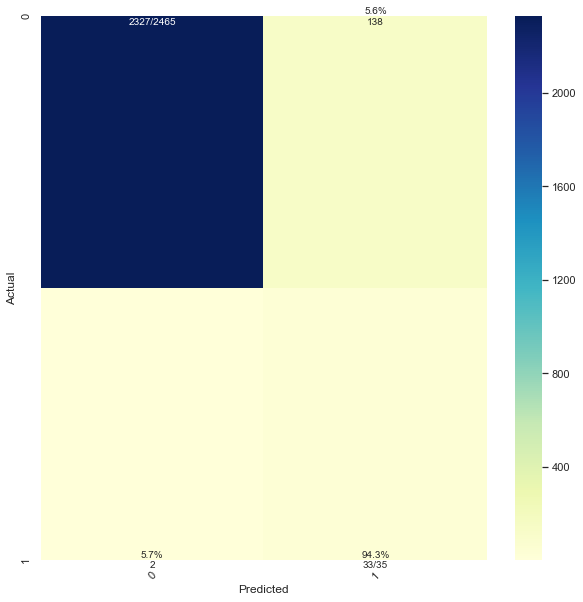

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.xticks(rotation=45)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)  


y_pred = upsampled_pred
y_true =y_test 

plot_cm(y_true, y_pred)


In [125]:
#4. Resampling techniques — Undersample majority class
# still using our separated classes default and not_default from above

# downsample majority
not_default_downsampled = resample(not_default,
                                replace = False, # sample without replacement
                                n_samples = len(default), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_default_downsampled, default])

# checking counts
downsampled.default_l.value_counts()

#1    94
#0    94
    

1    94
0    94
Name: default_l, dtype: int64

In [126]:

# trying logistic regression again with the undersampled dataset

y_train = downsampled.default_l
X_train = downsampled.drop('default_l', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

# Checking accuracy
accuracy_score(y_test, undersampled_pred)

#0.9

# f1 score
f1_score(y_test, undersampled_pred)

#0.21


recall_score(y_test, undersampled_pred)
#1.0 ?

#import seaborn as sn
#import pandas as pd
#import matplotlib.pyplot as plt

# confusion matrix
#pd.DataFrame(confusion_matrix(y_test, undersampled_pred))
#df_cm=pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

#sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}) # font size




#

#    0      1
#0  2215   250

#1   0     35


0.9428571428571428

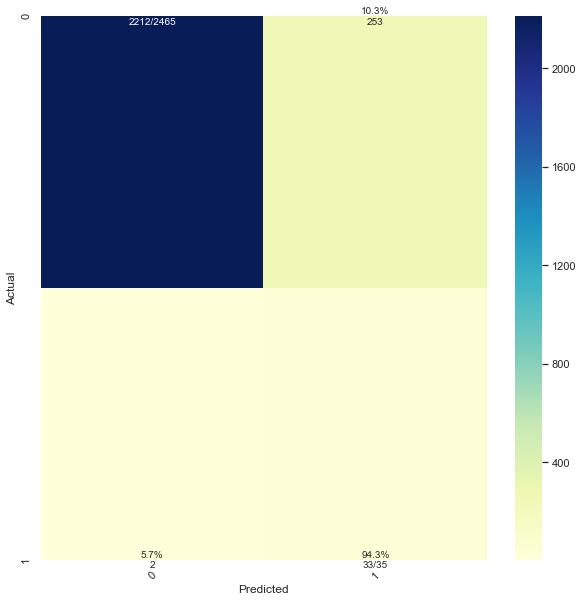

In [127]:
# confusion matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.xticks(rotation=45)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)  


y_pred = undersampled_pred
y_true =y_test 

plot_cm(y_true, y_pred)


In [128]:
#5. Generate synthetic samples
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.default_l
X = df.drop('default_l', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(sampling_strategy=0.5, random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [152]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)
#0.972

# f1 score
f1_score(y_test, smote_pred)
#0.459

recall_score(y_test, smote_pred)
#0.88






0.45925925925925926

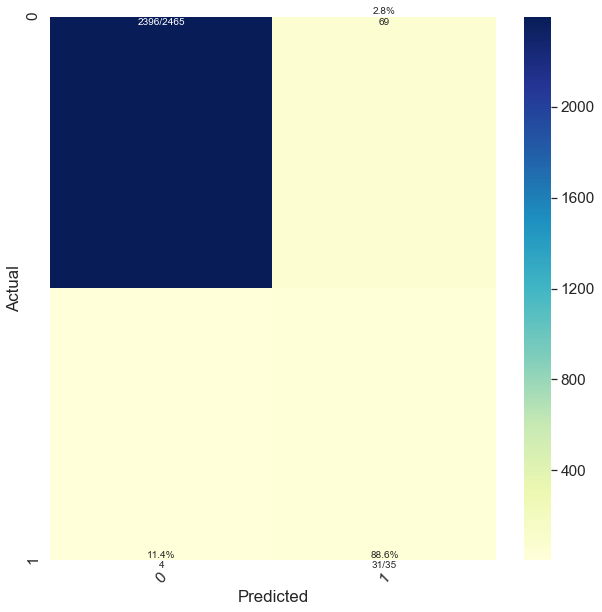

In [98]:
# confusion matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.xticks(rotation=45)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)  


y_pred = smote_pred
y_true =y_test 

plot_cm(y_true, y_pred)

In [130]:
#5.3. Feature Selection¶
#Steps of Running Feature Importance
#Split the data into X & y
#Run a Tree-based estimators (i.e. decision trees & random forests)
#Run Feature Importance

In [131]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [134]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(data_c2.drop('default_l', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for DEBT_RATIO is : 0.05381108478574461
The feature importance for PROFIT_MARGIN is : 0.09862961048219732
The feature importance for TOTAL_ASSETS is : 0.46116292942094744
The feature importance for QUICK_RATIO is : 0.3060123403494916
The feature importance for CURRENT_RATIO is : 0.018661330977590946
The feature importance for RETURN_ON_EQUITY is : 0.02706631815173732
The feature importance for PORTFOLIO_C&I is : 0.0
The feature importance for PORTFOLIO_CRE Construction is : 0.0
The feature importance for PORTFOLIO_CRE Permanent is : 0.0
The feature importance for PD_RISK_RATING_1 is : 0.0
The feature importance for PD_RISK_RATING_2 is : 0.0
The feature importance for PD_RISK_RATING_3 is : 0.004444051570262035
The feature importance for PD_RISK_RATING_4 is : 0.0
The feature importance for PD_RISK_RATING_5 is : 0.004669885517607448
The feature importance for PD_RISK_RATING_6 is : 0.006956179549254984
The feature importance for PD_RISK_RATING_7 is : 0.00829627327555

In [135]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

fi_df

index                     Feature  Feature Importance
0       2                TOTAL_ASSETS            0.461163
1       3                 QUICK_RATIO            0.306012
2       1               PROFIT_MARGIN            0.098630
3       0                  DEBT_RATIO            0.053811
4       5            RETURN_ON_EQUITY            0.027066
5       4               CURRENT_RATIO            0.018661
6      16            PD_RISK_RATING_8            0.010290
7      15            PD_RISK_RATING_7            0.008296
8      14            PD_RISK_RATING_6            0.006956
9      13            PD_RISK_RATING_5            0.004670
10     11            PD_RISK_RATING_3            0.004444
11     17            PD_RISK_RATING_9            0.000000
12      9            PD_RISK_RATING_1            0.000000
13     12            PD_RISK_RATING_4            0.000000
14     10            PD_RISK_RATING_2            0.000000
15      8     PORTFOLIO_CRE Permanent            0.000000
16      7  PORTFOLIO_CRE Construction            0.000000
17      6               PORTFOLIO_C&I            0.000000
18     18           PD_RISK_RATING_10            0.000000

In [ ]:
#using random forest for feature importance

In [136]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [137]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [138]:
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [139]:
print(selected_feat)


Index(['DEBT_RATIO', 'PROFIT_MARGIN', 'TOTAL_ASSETS', 'QUICK_RATIO'], dtype='object')


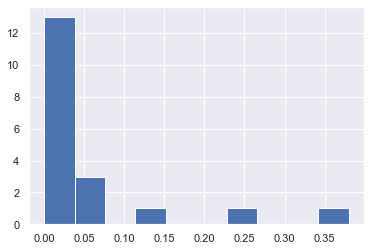

In [140]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()


In [ ]:
#What is Logistic Regression

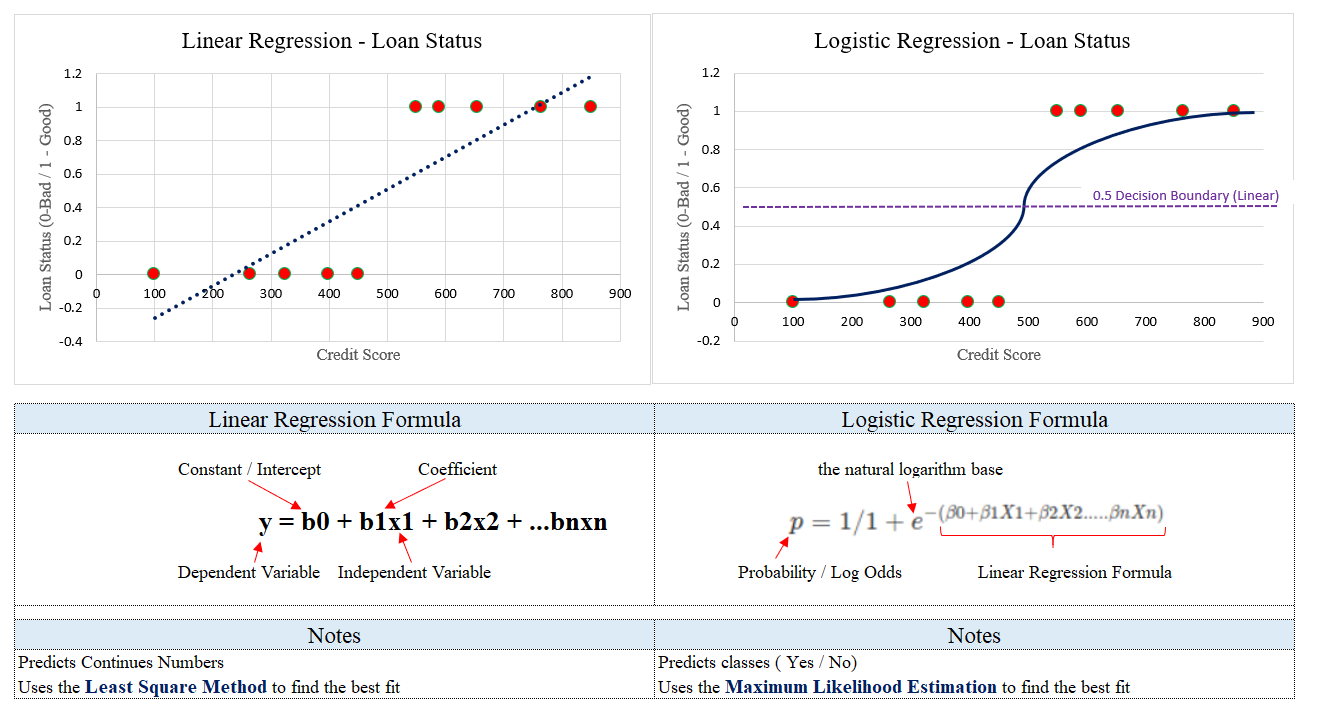

In [141]:
PATH = r"C:\Users\Araz\Desktop\MUFG\\"
Image(filename = PATH + "logisticRegression.png", width=900, height=900)

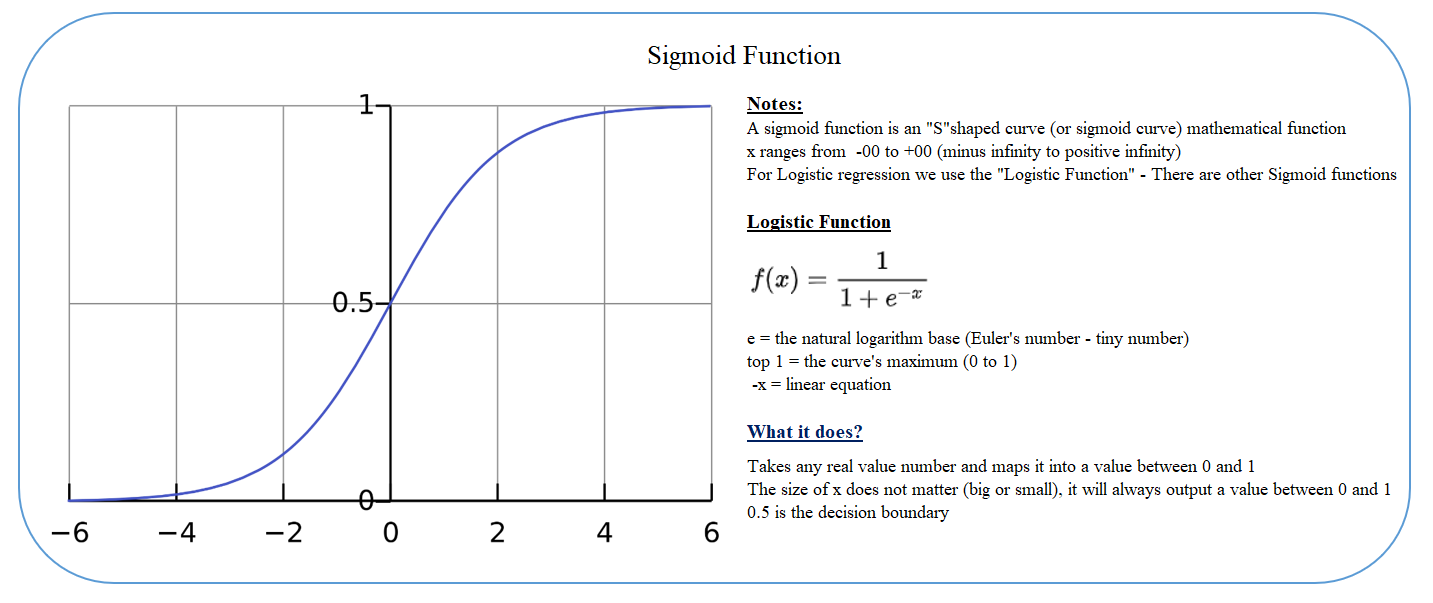

In [56]:

### Graphical

PATH = r"C:\Users\Araz\Desktop\MUFG\\"
Image(filename = PATH + "SigmuidFunction.png", width=900, height=900)

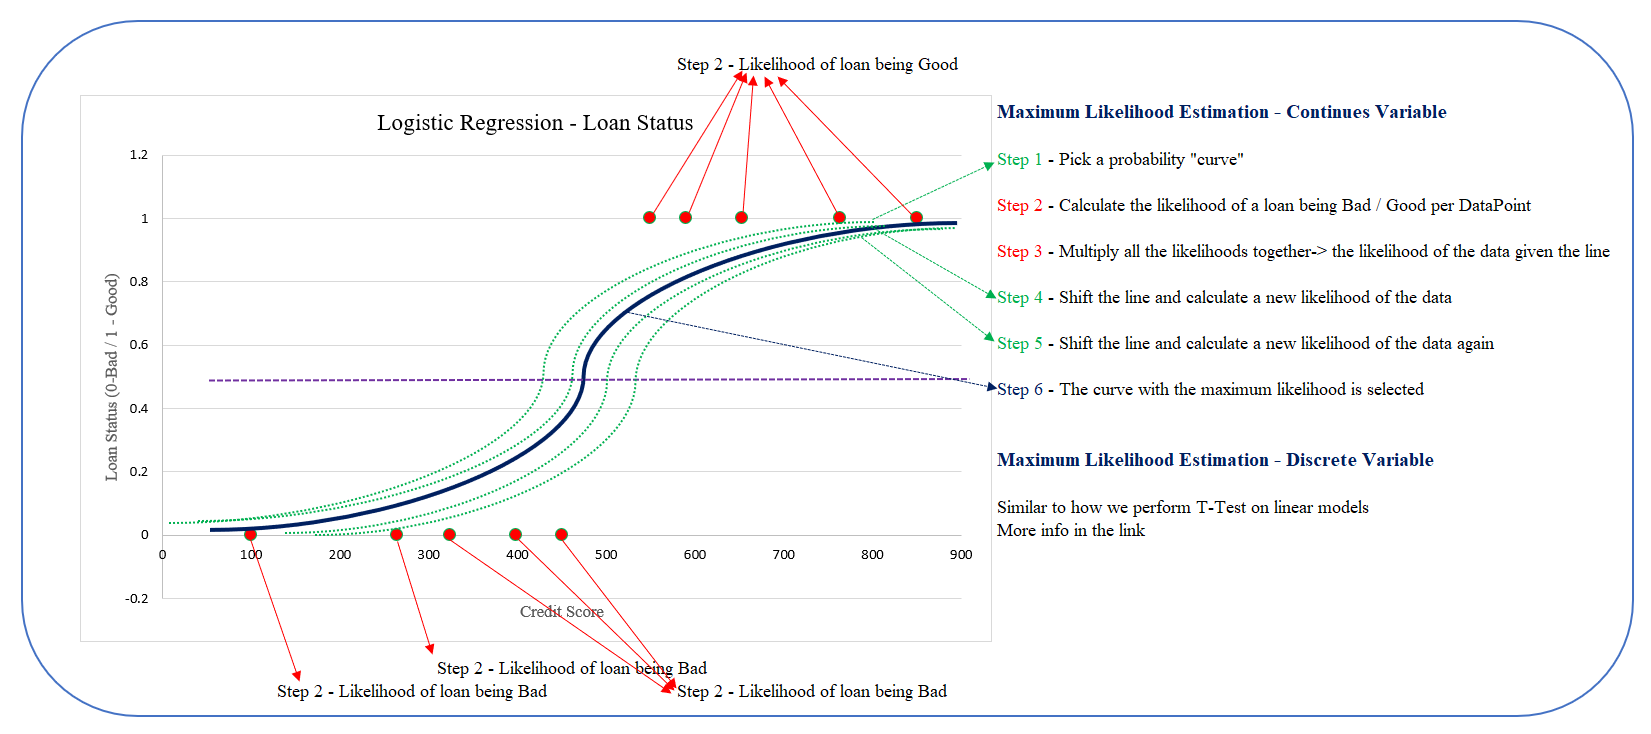

In [142]:
#How Maximum Likelihood works ?
### Graphical

PATH = r"C:\Users\Araz\Desktop\MUFG\\"
Image(filename = PATH + "MaxLikelihood.png", width=900, height=900)

In [164]:
#X_train, X_test, y_train, y_test

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Log_roc_auc=roc_auc_score(yValid,smote.predic(xValid))
#fpr,tpr, threshold=roc_curve(yValid,smote.predic(xValid)[:,1])

Log_roc_auc=roc_auc_score(y_test,upsampled.predict(X_test))
fpr,tpr, thresholds=roc_curve(y_test,upsampled.predict_proba(X_test)[:,1])

Log_roc_auc2=roc_auc_score(y_test,undersampled.predict(X_test))
fpr2,tpr2, thresholds=roc_curve(y_test,undersampled.predict_proba(X_test)[:,1])

Log_roc_auc3=roc_auc_score(y_test,smote.predict(X_test))
fpr3,tpr3, thresholds3=roc_curve(y_test,smote.predict_proba(X_test)[:,1])

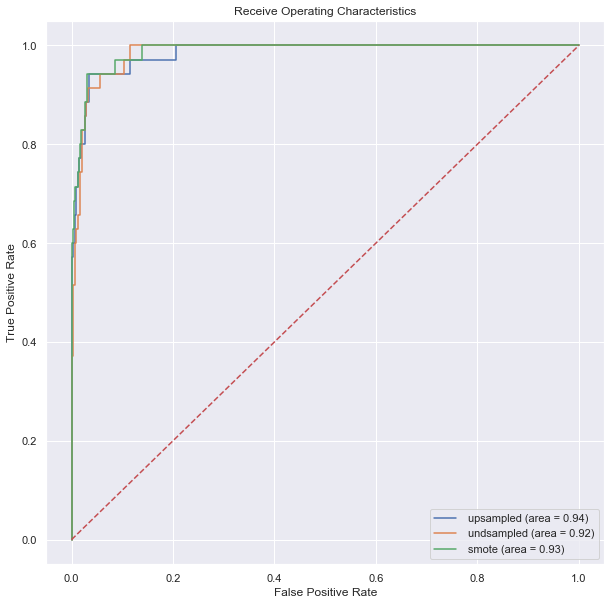

In [165]:
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, Label=" upsampled (area = %0.2f)" % Log_roc_auc)
plt.plot(fpr2,tpr2, Label=" undsampled (area = %0.2f)" % Log_roc_auc2)
plt.plot(fpr3,tpr3, Label=" smote (area = %0.2f)" % Log_roc_auc3)
plt.plot([0, 1], [0, 1],"r--")
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive Operating Characteristics")
plt.savefig("Log_ROC")
plt.legend(loc="lower right")
plt.show()

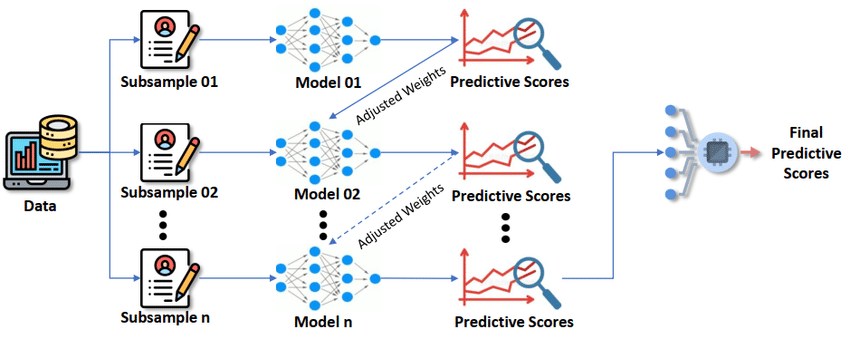

In [167]:
#How Boosting Algorithms works ?
### Graphical

PATH = r"C:\Users\Araz\Desktop\MUFG\\"
Image(filename = PATH + "XGBoost.png", width=900, height=900)

In [123]:
#Trying XGboost after Oversampling:
# train model

#y_train = upsampled.default_l
#X_train = upsampled.drop('default_l', axis=1)

from xgboost import XGBClassifier
# Initialize and train the XGBoost Classifier
# train model
xgc = XGBClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
xgc_pred = xgc.predict(X_test)

accuracy_score(y_test, xgc_pred)

f1_score(y_test, xgc_pred)

recall_score(y_test, xgc_pred)

#Accuracy increase to 0.9428571428571428 from 0.6857142857142857



0.9428571428571428

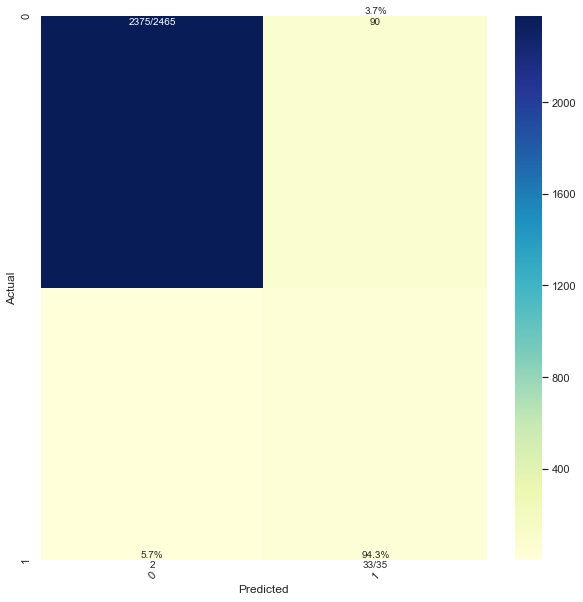

In [173]:
# confusion matrix for XGBoost on Upsampled Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.xticks(rotation=45)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)  


y_pred = xgc_pred
y_true =y_test 

plot_cm(y_true, y_pred)

In [122]:
#Trying Catboost after Oversampling:
# train model

#y_train = upsampled.default_l
#X_train = upsampled.drop('default_l', axis=1)
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize CatBoost Classifier
cbc = CatBoostClassifier()

# Setup RandomizedSearchCV
from scipy.stats import randint, uniform

# Parameter distribution
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

random_search_cb = RandomizedSearchCV(estimator=cbc,
                                      param_distributions=catboost_param_dist,
                                      cv=5,
                                      verbose=2,
                                      random_state=42)
# Fit the model on upsampled data
#y_train = upsampled.default_l
#X_train = upsampled.drop('default_l', axis=1)

random_search_cb.fit(X_train, y_train)
# Evaluate the model
random_search_cb_score = random_search_cb.score(X_test, y_test)
# predict on test set
random_search_cb_pred = random_search_cb.predict(X_test)

accuracy_score(y_test, random_search_cb_pred)

f1_score(y_test, random_search_cb_pred)

recall_score(y_test, random_search_cb_pred)
#accuracy improves to 0.8571428571428571 from 0.4

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] bagging_temperature=0.3745401188473625, border_count=93, depth=6, iterations=81, l2_leaf_reg=5, learning_rate=0.05680559213273095, random_strength=0.15599452033620265 
0:	learn: 0.6461100	total: 4.81ms	remaining: 385ms
1:	learn: 0.6031368	total: 9.6ms	remaining: 379ms
2:	learn: 0.5651710	total: 14ms	remaining: 364ms
3:	learn: 0.5299274	total: 17.8ms	remaining: 342ms
4:	learn: 0.4987736	total: 21.1ms	remaining: 320ms
5:	learn: 0.4699454	total: 25.1ms	remaining: 313ms
6:	learn: 0.4422676	total: 28.4ms	remaining: 300ms
7:	learn: 0.4176183	total: 31.5ms	remaining: 287ms
8:	learn: 0.3942919	total: 34.6ms	remaining: 277ms
9:	learn: 0.3728424	total: 37.9ms	remaining: 269ms
10:	learn: 0.3528308	total: 41.3ms	remaining: 263ms
11:	learn: 0.3347308	total: 44.4ms	remaining: 255ms
12:	learn: 0.3177965	total: 47.9ms	remaining: 250ms
13:	learn: 0.3019135	total: 51ms	remaining: 244ms
14:	learn: 0.2872823	total: 54.4ms	remaining: 239ms
1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


38:	learn: 0.1077482	total: 132ms	remaining: 142ms
39:	learn: 0.1042511	total: 135ms	remaining: 139ms
40:	learn: 0.1007403	total: 139ms	remaining: 136ms
41:	learn: 0.0976601	total: 143ms	remaining: 133ms
42:	learn: 0.0946945	total: 147ms	remaining: 130ms
43:	learn: 0.0922037	total: 151ms	remaining: 127ms
44:	learn: 0.0895203	total: 155ms	remaining: 124ms
45:	learn: 0.0868672	total: 159ms	remaining: 121ms
46:	learn: 0.0844545	total: 164ms	remaining: 119ms
47:	learn: 0.0821997	total: 168ms	remaining: 115ms
48:	learn: 0.0804913	total: 171ms	remaining: 112ms
49:	learn: 0.0782504	total: 175ms	remaining: 108ms
50:	learn: 0.0763642	total: 179ms	remaining: 105ms
51:	learn: 0.0748283	total: 183ms	remaining: 102ms
52:	learn: 0.0729901	total: 186ms	remaining: 98.2ms
53:	learn: 0.0712572	total: 189ms	remaining: 94.5ms
54:	learn: 0.0700352	total: 192ms	remaining: 90.9ms
55:	learn: 0.0684164	total: 195ms	remaining: 87.3ms
56:	learn: 0.0667448	total: 199ms	remaining: 83.6ms
57:	learn: 0.0653183	total

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


1:	learn: 0.6036502	total: 8.16ms	remaining: 322ms
2:	learn: 0.5657291	total: 12.2ms	remaining: 318ms
3:	learn: 0.5304180	total: 15.8ms	remaining: 304ms
4:	learn: 0.4983801	total: 19.5ms	remaining: 296ms
5:	learn: 0.4680111	total: 23.1ms	remaining: 289ms
6:	learn: 0.4405234	total: 27.4ms	remaining: 290ms
7:	learn: 0.4150921	total: 30.9ms	remaining: 282ms
8:	learn: 0.3915437	total: 34.6ms	remaining: 277ms
9:	learn: 0.3698591	total: 38.5ms	remaining: 273ms
10:	learn: 0.3497821	total: 42.3ms	remaining: 269ms
11:	learn: 0.3314017	total: 45.4ms	remaining: 261ms
12:	learn: 0.3144279	total: 48.6ms	remaining: 254ms
13:	learn: 0.2989554	total: 51.5ms	remaining: 247ms
14:	learn: 0.2843045	total: 54.5ms	remaining: 240ms
15:	learn: 0.2708067	total: 57.5ms	remaining: 234ms
16:	learn: 0.2579577	total: 60.6ms	remaining: 228ms
17:	learn: 0.2459044	total: 63.4ms	remaining: 222ms
18:	learn: 0.2350957	total: 66.4ms	remaining: 217ms
19:	learn: 0.2248335	total: 69.5ms	remaining: 212ms
20:	learn: 0.2147701	

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.7min finished


0:	learn: 0.5175166	total: 68.1ms	remaining: 55.4s
1:	learn: 0.3979698	total: 112ms	remaining: 45.7s
2:	learn: 0.3142836	total: 135ms	remaining: 36.5s
3:	learn: 0.2449009	total: 159ms	remaining: 32.2s
4:	learn: 0.1987046	total: 180ms	remaining: 29.1s
5:	learn: 0.1612446	total: 198ms	remaining: 26.8s
6:	learn: 0.1288610	total: 217ms	remaining: 25.1s
7:	learn: 0.1069969	total: 235ms	remaining: 23.7s
8:	learn: 0.0904667	total: 256ms	remaining: 22.9s
9:	learn: 0.0758384	total: 276ms	remaining: 22.3s
10:	learn: 0.0649549	total: 296ms	remaining: 21.6s
11:	learn: 0.0559069	total: 316ms	remaining: 21.1s
12:	learn: 0.0487806	total: 334ms	remaining: 20.6s
13:	learn: 0.0435916	total: 352ms	remaining: 20.1s
14:	learn: 0.0393641	total: 370ms	remaining: 19.7s
15:	learn: 0.0348020	total: 388ms	remaining: 19.4s
16:	learn: 0.0312112	total: 406ms	remaining: 19.1s
17:	learn: 0.0287939	total: 424ms	remaining: 18.8s
18:	learn: 0.0260923	total: 443ms	remaining: 18.6s
19:	learn: 0.0237744	total: 463ms	remain

0.8571428571428571

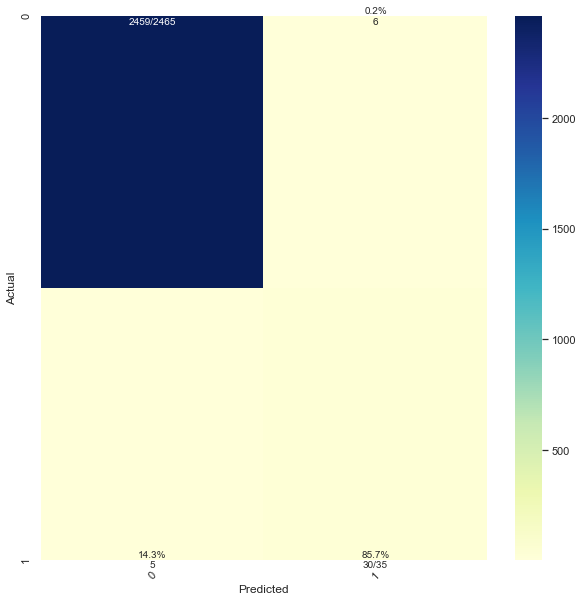

In [174]:
# confusion matrix for CatBoost (with Randomized Search for Cross-Validation) on Upsampled Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.xticks(rotation=45)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)  


y_pred = random_search_cb_pred
y_true =y_test 

plot_cm(y_true, y_pred)

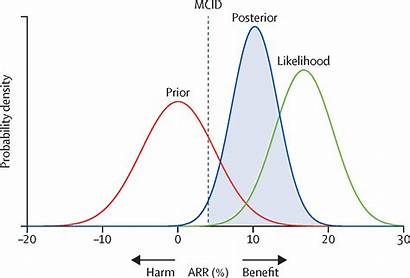

In [201]:
#How Naive Bayesian Algorithms works ?
### Graphical

PATH = r"C:\Users\Araz\Desktop\MUFG\\"
Image(filename = PATH + "Bayes.jpg", width=900, height=900)


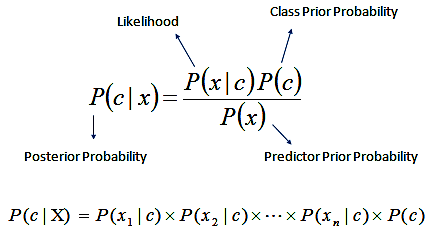

In [200]:
Image(filename = PATH + "Bayes3.png", width=900, height=900)

In [188]:
#Trying Naive Bayesian Classifier after Oversampling:
# train model

#y_train = upsampled.default_l
#X_train = upsampled.drop('default_l', axis=1)

from sklearn.naive_bayes import GaussianNB
# Initialize and train the Classifier
# train model
gnb = GaussianNB().fit(X_train, y_train)

# predict on test set
gnb_pred = gnb.predict(X_test)

accuracy_score(y_test, gnb_pred)

f1_score(y_test, gnb_pred)

recall_score(y_test, gnb_pred)

#Accuracy ratio on upsampled data  is 0.8876

0.8876

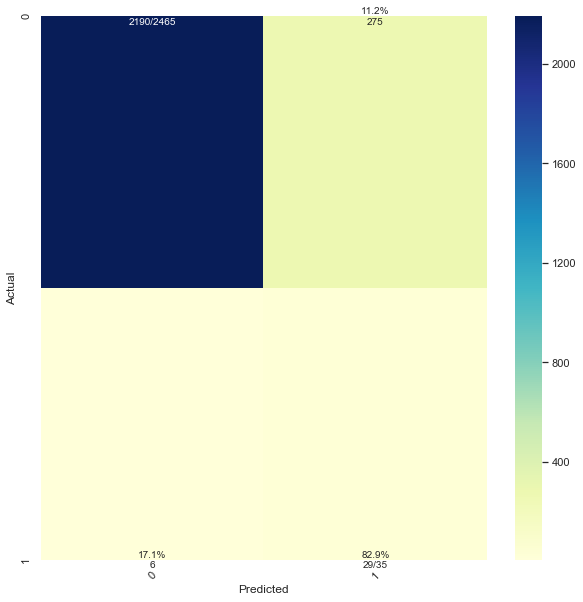

In [181]:
# confusion matrix for Gaussian Naive Bayesian Classifier on Upsampled Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.xticks(rotation=45)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)  


y_pred = gnb_pred
y_true =y_test 

plot_cm(y_true, y_pred)

In [168]:
Log_roc_auc4=roc_auc_score(y_test,random_search_cb.predict(X_test)) #CatBoost
fpr4,tpr4, thresholds4=roc_curve(y_test,random_search_cb.predict_proba(X_test)[:,1])

In [169]:
Log_roc_auc5=roc_auc_score(y_test,xgc.predict(X_test)) #XGBosst
fpr5,tpr5, thresholds5=roc_curve(y_test,xgc.predict_proba(X_test)[:,1])

In [182]:
Log_roc_auc6=roc_auc_score(y_test,gnb.predict(X_test)) #XGBosst
fpr6,tpr6, thresholds6=roc_curve(y_test,gnb.predict_proba(X_test)[:,1])

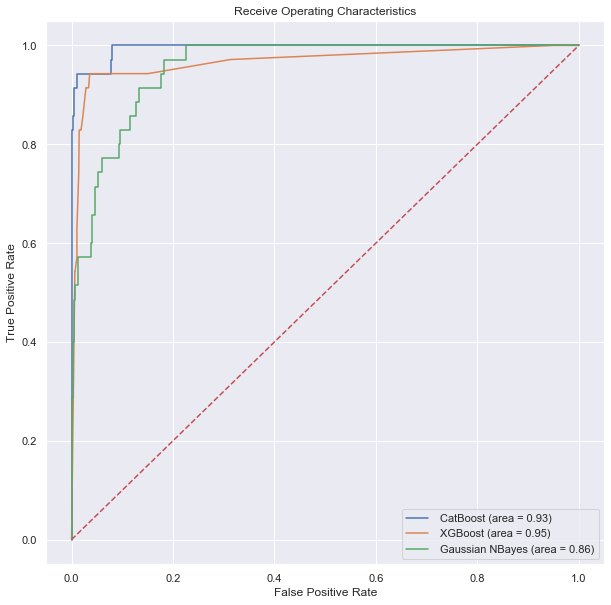

In [194]:
plt.figure(figsize=(10,10))

plt.plot(fpr4,tpr4, Label=" CatBoost (area = %0.2f)" % Log_roc_auc4)
plt.plot(fpr5,tpr5, Label=" XGBoost (area = %0.2f)" % Log_roc_auc5)
plt.plot(fpr6,tpr6, Label=" Gaussian NBayes (area = %0.2f)" % Log_roc_auc6)

plt.plot([0, 1], [0, 1],"r--")
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive Operating Characteristics")
plt.savefig("Log_ROC")
plt.legend(loc="lower right")
plt.show()

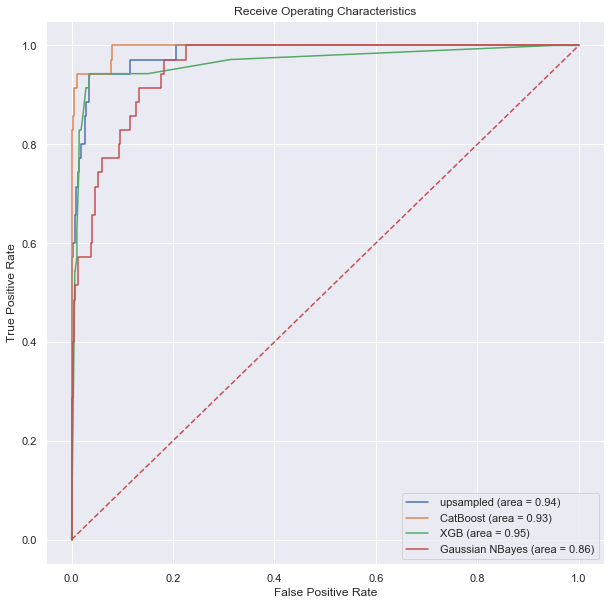

In [193]:
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, Label=" upsampled (area = %0.2f)" % Log_roc_auc)
#plt.plot(fpr2,tpr2, Label=" undsampled (area = %0.2f)" % Log_roc_auc2)
#plt.plot(fpr3,tpr3, Label=" smote (area = %0.2f)" % Log_roc_auc3)
plt.plot(fpr4,tpr4, Label=" CatBoost (area = %0.2f)" % Log_roc_auc4)
plt.plot(fpr5,tpr5, Label=" XGB (area = %0.2f)" % Log_roc_auc5)
plt.plot(fpr6,tpr6, Label=" Gaussian NBayes (area = %0.2f)" % Log_roc_auc6)

plt.plot([0, 1], [0, 1],"r--")
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive Operating Characteristics")
plt.savefig("Log_ROC")
plt.legend(loc="lower right")
plt.show()